# Brand Sales Dataset SQL Analysis
### By: Rithvik Mandumula

In [ ]:
# If you do not have Pandas installed, Remove the comment on the line below and Run this cell to manually install
#!pip install -u pandas

In [ ]:
# If you do not have pandasql installed, Remove the comment on the line below and Run this cell to manually install
#!pip install -U pandasql

In [1]:
# If you do not have matplotlib installed, Remove the comment on the line below and Run this cell to manually install
#!pip install -U matplotlib

In [3]:
#importing the Pandas Library
import pandas as pd

#importing the sqldf fucntion library from the pandasql package
from pandasql import sqldf

#reading the data(csv_files) and assigning each file to a dataframe
df_users = pd.read_csv('https://raw.githubusercontent.com/RithvikM14/Fetch_Files/main/users.csv')

df_receipts = pd.read_csv('https://raw.githubusercontent.com/RithvikM14/Fetch_Files/main/receipts.csv')

df_receipt_items = pd.read_csv('https://raw.githubusercontent.com/RithvikM14/Fetch_Files/main/receipt_items.csv')

df_brands = pd.read_csv('https://raw.githubusercontent.com/RithvikM14/Fetch_Files/main/brands.csv')



##### Now, let's answer some questions business stakeholders may have about the data

### Question 1: Which brand saw the most dollars spent in the month of June?

In [10]:
#STEP 1
#Combined the joinable keys/columns that were needed which were BRAND_CODE and ID/REWARDS_RECEIPT_ID
#Filtered for the month of June(for all years) and displayed the sum of the dollars spent for each brand
query1 = """ 
            SELECT ri.BRAND_CODE, PURCHASE_DATE AS MONTH, SUM(TOTAL_FINAL_PRICE) AS DOLLARS_SPENT
            FROM df_receipt_items ri 
            LEFT OUTER JOIN df_brands b ON ri.BRAND_CODE = b.BRAND_CODE
            LEFT OUTER JOIN df_receipts r ON ri.REWARDS_RECEIPT_ID = r.ID
            WHERE substring([PURCHASE_DATE],6,2) = '06' AND ri.BRAND_CODE IS NOT NULL
            GROUP BY ri.BRAND_CODE, b.NAME
            """
#Using sqldf function to run the query
result_query1 = sqldf(query1)
result_query1






,BRAND_CODE,MONTH,DOLLARS_SPENT
0,*KIRKLAND,2021-06-17T00:00:00Z,18.31
1,-,2022-06-27T00:00:00Z,2.36
2,1-PINT POT VINCA,2022-06-23T00:00:00Z,3.02
3,1323 99999,2022-06-22T00:00:00Z,5.79
4,19 CRIMES,2021-06-17T00:00:00Z,33.27
...,...,...,...
2737,ZOOM-O,2021-06-29T00:00:00Z,14.88
2738,ZOTEKI,2022-06-15T00:00:00Z,0.85
2739,ZURU,2022-06-12T00:00:00Z,11.25
2740,ZYRTEC,2021-06-16T00:00:00Z,61.23


In [13]:
#STEP 2
#Out of the all the Brands in June(all years), this query shows us only the highest spending brand

query1_final = """SELECT * FROM result_query1 
                WHERE DOLLARS_SPENT = (SELECT MAX(DOLLARS_SPENT) FROM result_query1)
                """
#Using sqldf function to run the query
result_query1_final = sqldf(query1_final)
result_query1_final

,BRAND_CODE,MONTH,DOLLARS_SPENT
0,KIRKLAND SIGNATURE,2021-06-15T00:00:00Z,2571.83


##### Answer for Q1: The Brand that spent the most money in June is Kirkland Signature with 2571.83 Dollars.

### Question 2: Which user spent the most money in the month of August?

In [16]:
#STEP 1
#Combined the joinable keys/columns needed which were USER_ID and ID
#Filtered for the month of August(for all years) and displayed the sum of money spent for each user ID.
query2 = """
            SELECT u.ID, SUM(TOTAL_SPENT) AS TOTAL_SPENT
            FROM df_receipts r
            LEFT OUTER JOIN df_users u ON r.USER_ID = u.ID
            WHERE substring([PURCHASE_DATE],6,2) = '08' 
            GROUP BY u.ID
            """
#Using sqldf function to run the query
result_query2 = sqldf(query2)
result_query2

,ID,TOTAL_SPENT
0,5fef29605b73fc128b245f36,5019.41
1,5ff48849291b6b12931ce51f,959.61
2,5ffb49a847903912705e9a64,20307.14
3,5ffdf6f6224dc11273156070,1359.62
4,6001dbb3878e221317c8a065,48.11
...,...,...
86,61b3aeab09f87d4328df1820,789.50
87,61b450154d2ff607dab7c0aa,4055.77
88,61b8e6ab3c43881d14ba868d,129.73
89,61bfce5d6655417f803b6538,1127.46


In [18]:
#STEP 2
#Out of the all the Users in August(for all years), this query shows us only the User that spend the most money.
query2_final = """SELECT * FROM result_query2
                WHERE TOTAL_SPENT = (SELECT MAX(TOTAL_SPENT) FROM result_query2)
                """
#Using sqldf function to run the query
result_query2_final = sqldf(query2_final)
result_query2_final

,ID,TOTAL_SPENT
0,609ab37f7a2e8f2f95ae968f,157739.14


##### Answer for Q2: The User that spent the most money in August User 609ab37f7a2e8f2f95ae968f  with 157739.14 Dollars.

### Question 3 and 4: Which user bought the most expensive item? What was the name of the item?

In [39]:
#This query answers both questions!
#Combined the joinable keys/columns ID and REWARDS_RECEIPT_ID
#Filtered to show only the most expensive item(s)
query3 = """
            SELECT r.USER_ID, TOTAL_FINAL_PRICE, REWARDS_RECEIPT_ID, DESCRIPTION
            FROM df_receipt_items ri
            LEFT OUTER JOIN df_receipts r ON r.ID = ri.REWARDS_RECEIPT_ID
            WHERE TOTAL_FINAL_PRICE = (SELECT MAX(TOTAL_FINAL_PRICE) FROM df_receipt_items rii)
            """
#Using sqldf function to run the query
result_query3 = sqldf(query3)
result_query3

,USER_ID,TOTAL_FINAL_PRICE,REWARDS_RECEIPT_ID,DESCRIPTION
0,617376b8a9619d488190e0b6,31005.99,62c6300d0a72315a3e1b202e,Starbucks Iced Coffee Premium Coffee Beverage ...
1,617376b8a9619d488190e0b6,31005.99,62c646070a724909a71bc288,Starbucks Iced Coffee Premium Coffee Beverage ...


##### Answer for Q3/4: Interestingly, User 617376b8a9619d488190e0b6 bought the most expensive item twice and this item was a Starbucks Iced Coffee Premium Coffee Beverage 

### Question 5: How many users scanned in each month?

In [40]:
#Filtered by year and month to show the scans in chronological order
#Displayed the scans for each month
query4 = """ 
            SELECT substring([DATE_SCANNED],1,4) AS YEAR, substring([DATE_SCANNED],6,2) AS MONTH, COUNT(*) AS TOTAL_SCANS
            FROM df_receipts r
            GROUP BY substring([DATE_SCANNED],1,4), substring([DATE_SCANNED],6,2)
            """
#Using sqldf function to run the query
result_query4 = sqldf(query4)
result_query4


,YEAR,MONTH,TOTAL_SCANS
0,2021,01,302
1,2021,02,525
2,2021,03,948
3,2021,04,1228
4,2021,05,1838
5,2021,06,1824
6,2021,07,2145
7,2021,08,2436
8,2021,09,2682
9,2021,10,3450


#### Answer for Q5: The Scans for each month are shown in the table above.

## Interesting Observations

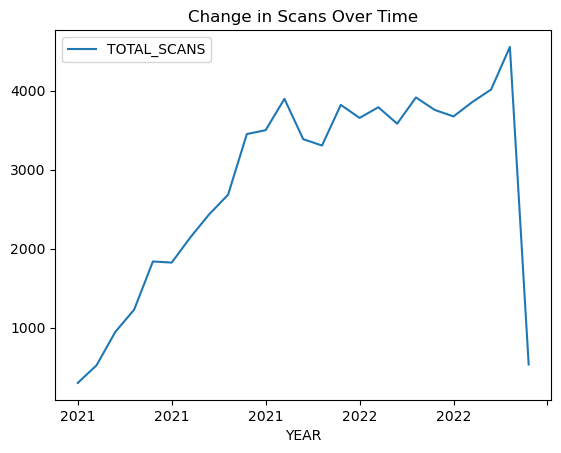

<AxesSubplot:title={'center':'Most Popular Categories'}>

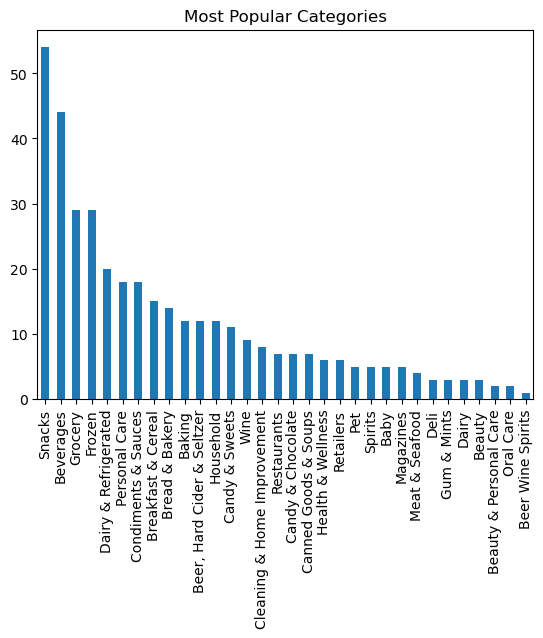

In [41]:
#used matplotlib library and pandas in order to plot visualizations that showcase something interesting about the data.

#PLOT 1: Shows the change in scans over time
import matplotlib.pyplot as plt
result_query4.plot(x="YEAR", y=["TOTAL_SCANS"], title = "Change in Scans Over Time")
plt.show()

#PLOT 2: Shows the most popular categories of items bought
df_brands['CATEGORY'].value_counts().plot(kind='bar', title='Most Popular Categories')




##### A non-technical business stakeholder would learn from the first graph that the amount of scans has been dramatically increasing over time since the beginning of 2021. This is representative of the success of the company and is a positive sign to potential stakeholders. Additionally, another visualization shows the most popular categories of items that are being purchases and scanned into the ecommerce app. This can be useful information for the employees at the company to know what industries/categories of items to push/promote in their app/service to maximixe revenue.

